In [5]:
import tkinter as tk
import nltk
from textblob import TextBlob
from newspaper import Article
from os import listdir
import string
from pickle import dump, load
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

C:\Users\Ojas Gupta\AppData\Local\Temp\ipykernel_20476\2594126759.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [1]:
DATA_PATH= 'CNNLinks.csv'

In [2]:
class Load_data:
    def __init__(self, dir_path):
        self.dir_path = dir_path
        
    def load(self):
        data = pd.read_csv(self.dir_path)
        return data
    
    def drop(self):
        data = self.load()
        data = data.drop(columns=["Id","Author", "Date"])
        
        return data
    
    def analyze_data(self):
        data = self.drop()

        for sr_no, url in enumerate(data['URL']):
            article = Article(url)
            article.download()
            article.parse()
            article.nlp()
            analysis = TextBlob(article.text)
            print(f'Title: {article.title}')
            print(f'Summary: {article.summary}')
            print('-----------------------------------------------')

    def sentiment(self):
        data = self.drop()
        
        for sr_no, url in enumerate(data['URL']):
            article = Article(url)
            article.download()
            article.parse()
            article.nlp()
            analysis=TextBlob(article.text)
            print(analysis.sentiment)
            print(analysis.polarity)
            print(f'Polarity: {"positive" if analysis.polarity>0 else "negative" if analysis.polarity<0 else "neutral"}')
            print(f'Subjectivity: {"Biased And Less Factual" if 1 >= analysis.subjectivity > 0.4 else "Unbiased And More Factual" if 0.4 >= analysis.subjectivity >= 0 else "Invalid subjectivity score"}')
            print('-----------------------------------------------')

    # def sentiment_EDA(self):
    #     data = self.drop()
    #     sentiment_data = []
    #     for sr_no, url in enumerate(data['URL']):
    #         article = Article(url)
    #         article.download()
    #         article.parse()
    #         article.nlp()
    #         analysis = TextBlob(article.text)
    #         sentiment = [
    #             analysis.polarity,
    #             analysis.subjectivity,
    #             1 if analysis.polarity > 0 else -1  # Map 'positive' to 1, 'negative' to -1
    #         ]
    #         sentiment_data.append(sentiment)
    #     self.sentiment_data = pd.DataFrame(sentiment_data, columns=['Polarity', 'Subjectivity', 'Sentiment'])
    #     return self.sentiment_data
    # def sentiment_EDA(self):
    #     data = self.drop()
    #     sentiment_data = []
    #     for sr_no, url in enumerate(data['URL']):
    #         article = Article(url)  # Assuming Article class exists
    #         try:
    #             article.download()
    #             article.parse()
    #             article.nlp()
    #         except Exception as e:  # Handle potential errors during processing
    #             print(f"Error processing article {url}: {e}")
    #             continue  # Skip to next article if processing fails

    #         analysis = TextBlob(article.text)
    #         sentiment = [
    #             analysis.polarity,
    #             analysis.subjectivity,
    #             1 if analysis.polarity > 0 else -1  # Map positive to 1, negative to -1
    #         ]
    #         sentiment_data.append(sentiment)

    #     self.sentiment_data = pd.DataFrame(sentiment_data, columns=['Polarity', 'Subjectivity', 'Sentiment'])
    #     return self.sentiment_data
    def sentiment_EDA(self):
        data = self.drop()
        sentiment_data = []
        for sr_no, url in enumerate(data['URL']):
            article = Article(url)
            article.download()
            article.parse()
            article.nlp()
            analysis = TextBlob(article.text)
            sentiment = [
                analysis.polarity,
                analysis.subjectivity,
            ]
            sentiment_data.append(sentiment)
        self.sentiment_data = pd.DataFrame(sentiment_data, columns=['Polarity', 'Subjectivity'])
        return self.sentiment_data

In [3]:
obj= Load_data(DATA_PATH)

In [6]:
data= obj.load()
data.head()

,Id,Author,Date,URL
0,1,Stephen Collinson,"April 29, 2024",https://edition.cnn.com/2024/04/28/politics/bi...
1,2,John Towfighi,"April 28, 2024",https://edition.cnn.com/2023/10/11/business/ha...
2,3,Andrew Carey and Olga Voitovych,"April 28, 2024",https://edition.cnn.com/2024/04/28/europe/russ...
3,4,Andrew Carey and Olga Voitovych,"April 28, 2024",https://edition.cnn.com/2024/03/13/travel/aust...
4,5,Silvia Marchetti,"April 28, 2024",https://edition.cnn.com/travel/italy-house-bou...


In [46]:
data= obj.drop()
data.head()

,URL
0,https://edition.cnn.com/2024/04/28/politics/bi...
1,https://edition.cnn.com/2023/10/11/business/ha...
2,https://edition.cnn.com/2024/04/28/europe/russ...
3,https://edition.cnn.com/2024/03/13/travel/aust...
4,https://edition.cnn.com/travel/italy-house-bou...


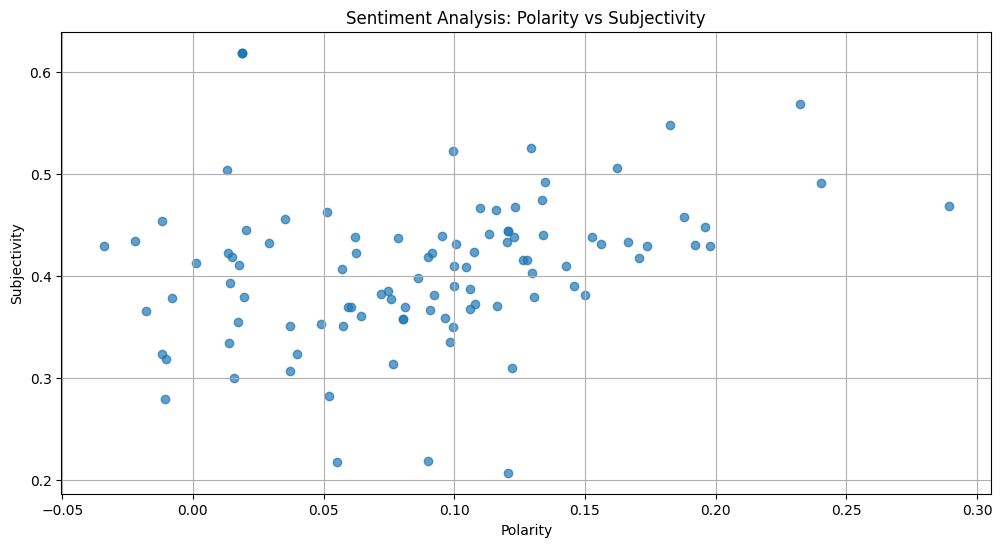

In [47]:
# sentiment_df = obj.sentiment_EDA()

# # Plot the sentiment analysis
# sentiment_df['Color'] = sentiment_df['Sentiment'].apply(lambda x: 1 if x == "positive" else (0 if x == "negative" else None))

# sentiment_df['Color'] = sentiment_df['Sentiment'].map({1: 1, -1: 0})  # Map positive to 1, negative to 0
# plt.figure(figsize=(12, 6))
# plt.scatter(sentiment_df['Polarity'], sentiment_df['Subjectivity'], c=sentiment_df['Color'], alpha=0.7)
# #....
# plt.title('Sentiment Analysis: Polarity vs Subjectivity')
# plt.xlabel('Polarity')
# plt.ylabel('Subjectivity')
# plt.grid(True)
# plt.legend(['Positive', 'Negative'])

# plt.show()
# sentiment_df = obj.sentiment_EDA()

# # Leverage a dictionary with map for color assignment
# sentiment_to_color = {"positive": 1, "negative": 0}
# sentiment_df['Color'] = sentiment_df['Sentiment'].map(sentiment_to_color)

# plt.figure(figsize=(12, 6))
# plt.scatter(sentiment_df['Polarity'], sentiment_df['Subjectivity'], c=sentiment_df['Color'], alpha=0.7)
# # ... rest of your plotting code (title, labels, grid, legend)
# plt.show()
# Create an instance of Load_data

# Call the sentiment_EDA method to generate sentiment data
sentiment_df = obj.sentiment_EDA()

# Plot the EDA
plt.figure(figsize=(12, 6))
plt.scatter(sentiment_df['Polarity'], sentiment_df['Subjectivity'], alpha=0.7)
plt.title('Sentiment Analysis: Polarity vs Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.grid(True)

plt.show()


Text(0, 0.5, 'Frequency')

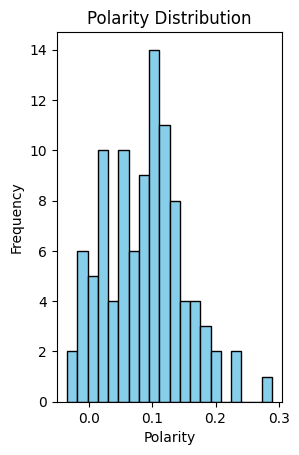

In [48]:
plt.subplot(1, 2, 1)
plt.hist(sentiment_df['Polarity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

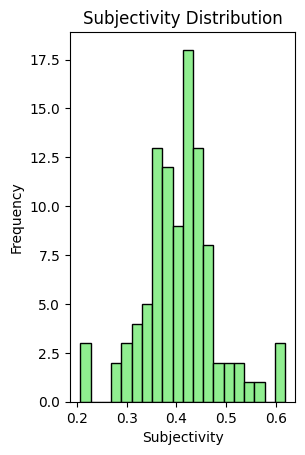

In [49]:
plt.subplot(1, 2, 2)
plt.hist(sentiment_df['Subjectivity'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Subjectivity Distribution')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

In [50]:
obj.analyze_data()

Title: Biden is up against nostalgia for Trump’s first term
Summary: More than half, 55%, of all Americans say they see Trump’s presidency as a success, while 44% see it as a failure.
Four years ago, he was able to assail Trump’s time in office from his position as a challenger.
Biden won all three in 2020 after Trump won them in 2016 in his victory over Democratic nominee Hillary Clinton.
In the poll, 92% of Republicans view Trump’s time in office a success, while just 73% of Democrats say Biden’s has been a success.
And while 85% of Democrats polled say they back Biden, 91% of Republicans say they support Trump.
-----------------------------------------------
Title: Harvard student groups issued an anti-Israel statement. CEOs want them blacklisted
Summary: Following a backlash to the statement, some of the student groups have since withdrawn their endorsements.
Others warn that naming the students whose groups backed the statement could put the students in harms way and did not accou

In [51]:
obj.sentiment()

Sentiment(polarity=0.07583956138201421, subjectivity=0.3773878497463404)
0.07583956138201421
Polarity: positive
Subjectivity: Unbiased And More Factual
-----------------------------------------------
Sentiment(polarity=-0.011835891381345926, subjectivity=0.45366366587957485)
-0.011835891381345926
Polarity: negative
Subjectivity: Biased And Less Factual
-----------------------------------------------
Sentiment(polarity=0.013779170048701302, subjectivity=0.33360355790043283)
0.013779170048701302
Polarity: positive
Subjectivity: Unbiased And More Factual
-----------------------------------------------
Sentiment(polarity=0.12777333777333774, subjectivity=0.4155550005550005)
0.12777333777333774
Polarity: positive
Subjectivity: Biased And Less Factual
-----------------------------------------------
Sentiment(polarity=0.13391106791600213, subjectivity=0.4397304815067975)
0.13391106791600213
Polarity: positive
Subjectivity: Biased And Less Factual
----------------------------------------------